In [41]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [42]:
# read the excel file
df = pd.read_excel(r"C:\Users\priya\Downloads\customer_churn_large_dataset.xlsx")

In [43]:
# first 5 rows of dataframe
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [44]:
# information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [45]:
# decription of the data 
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [46]:
# datatypes of the data
df.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [47]:
# shape of the data
df.shape

(100000, 9)

In [48]:
#Missing Values
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})

In [49]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
CustomerID,0,0.0
Name,0,0.0
Age,0,0.0
Gender,0,0.0
Location,0,0.0
Subscription_Length_Months,0,0.0
Monthly_Bill,0,0.0
Total_Usage_GB,0,0.0
Churn,0,0.0


there are no missing values

In [50]:
#Duplicate Data
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


In [51]:
df_num_features = df.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',df_num_features.columns)

The numerical columns in the dataset are:  Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')


In [52]:
# Display basic statistics for numerical variables
print(df[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']].describe())

                 Age  Subscription_Length_Months   Monthly_Bill  \
count  100000.000000               100000.000000  100000.000000   
mean       44.027020                   12.490100      65.053197   
std        15.280283                    6.926461      20.230696   
min        18.000000                    1.000000      30.000000   
25%        31.000000                    6.000000      47.540000   
50%        44.000000                   12.000000      65.010000   
75%        57.000000                   19.000000      82.640000   
max        70.000000                   24.000000     100.000000   

       Total_Usage_GB  
count   100000.000000  
mean       274.393650  
std        130.463063  
min         50.000000  
25%        161.000000  
50%        274.000000  
75%        387.000000  
max        500.000000  


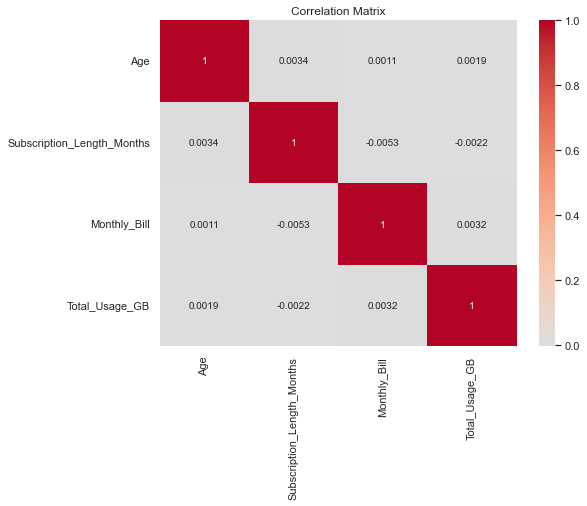

In [53]:
# Correlation matrix for numerical variables
correlation_matrix = df[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

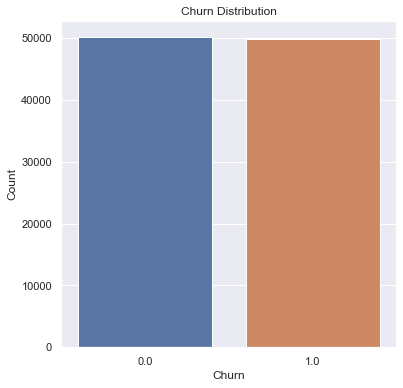

In [54]:
# Churn distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# AUTOMATED EDA

# D-Tale

In [55]:
# d-tale in a few lines of code we can analyze and visualize the data

In [56]:
!pip install dtale
import dtale
dtale.show(df)


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
# handling outliers 

In [58]:
df_num_features=df.select_dtypes(include=np.number)

In [59]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                    49999.5
Age                              26.0
Subscription_Length_Months       13.0
Monthly_Bill                     35.1
Total_Usage_GB                  226.0
Churn                             1.0
dtype: float64


In [60]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column CustomerID are 0
Total number of Outliers in column Age are 0
Total number of Outliers in column Subscription_Length_Months are 0
Total number of Outliers in column Monthly_Bill are 0
Total number of Outliers in column Total_Usage_GB are 0
Total number of Outliers in column Churn are 0


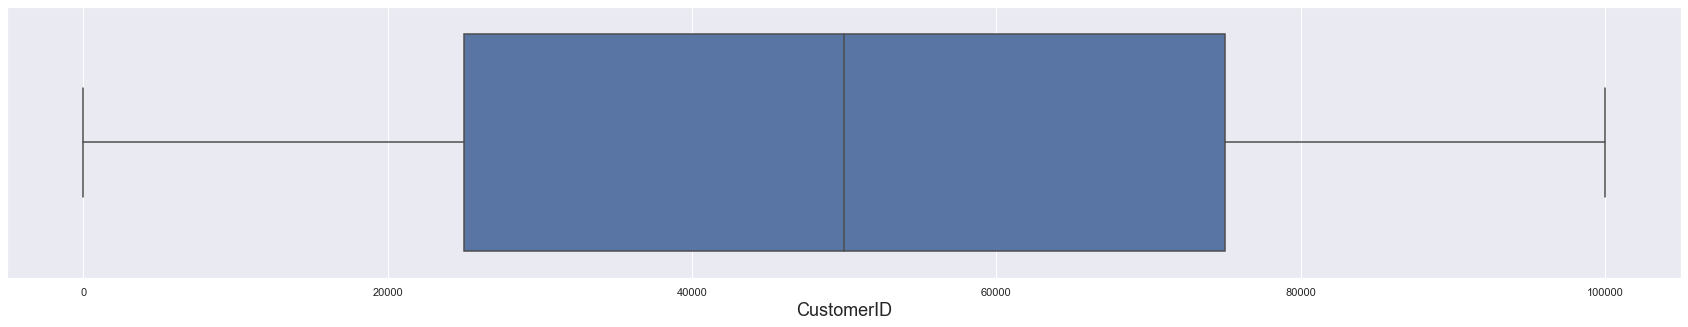

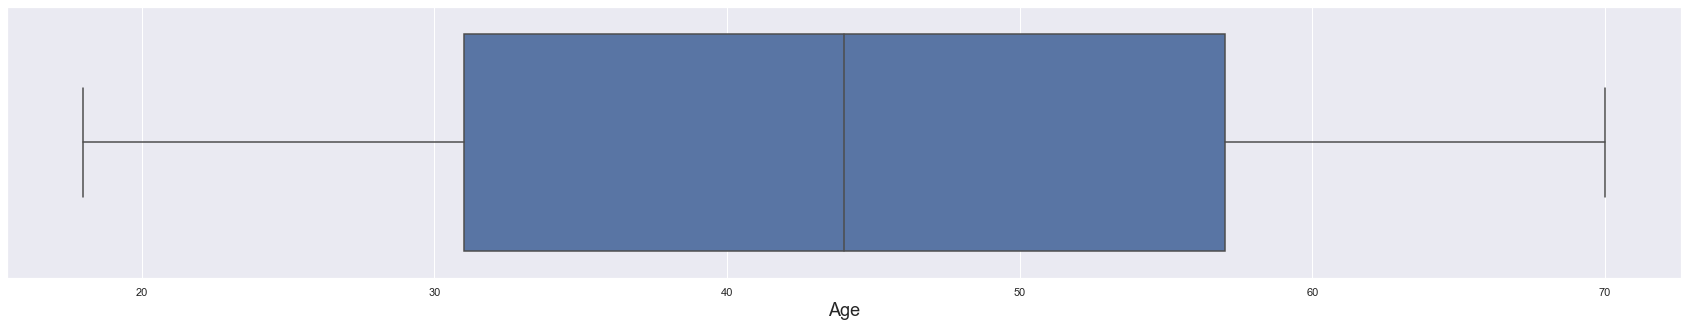

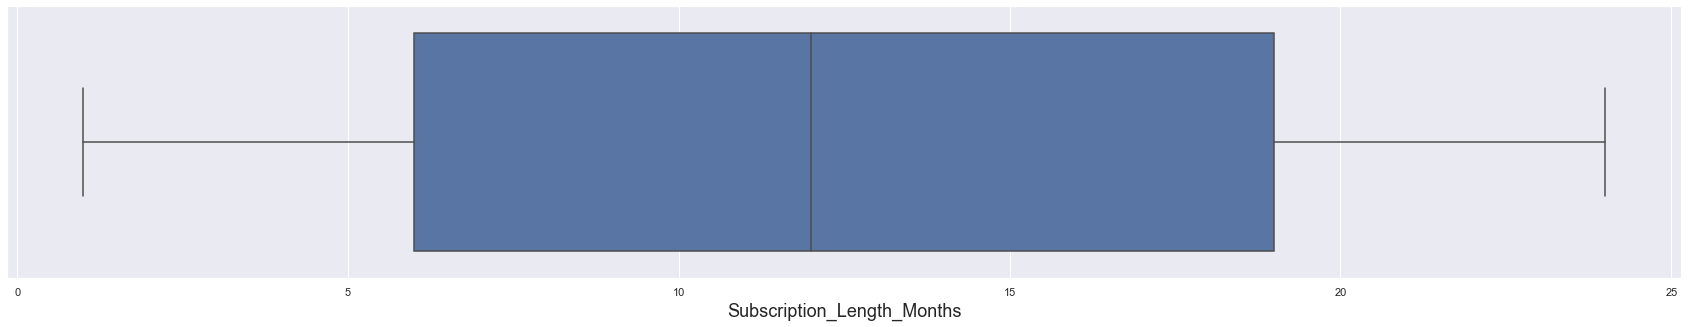

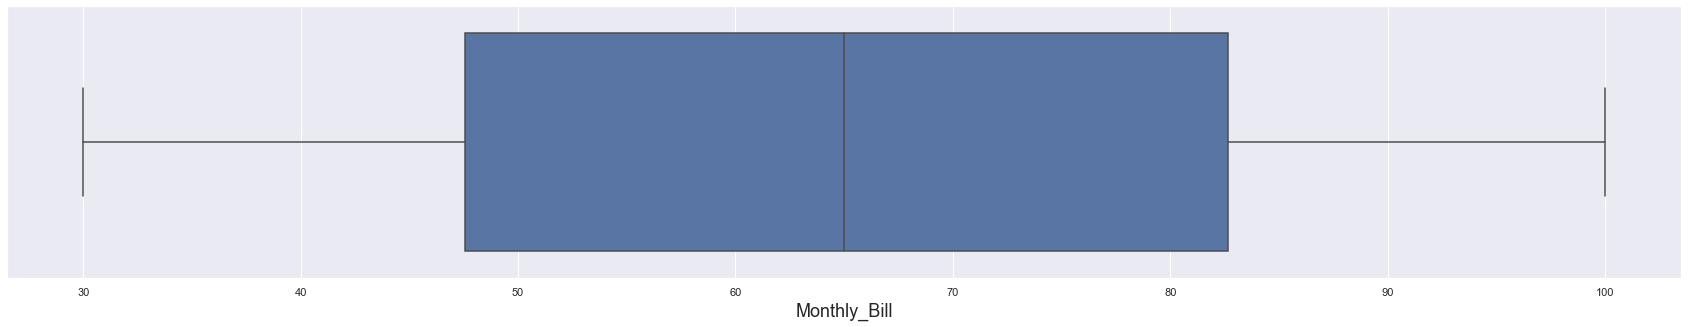

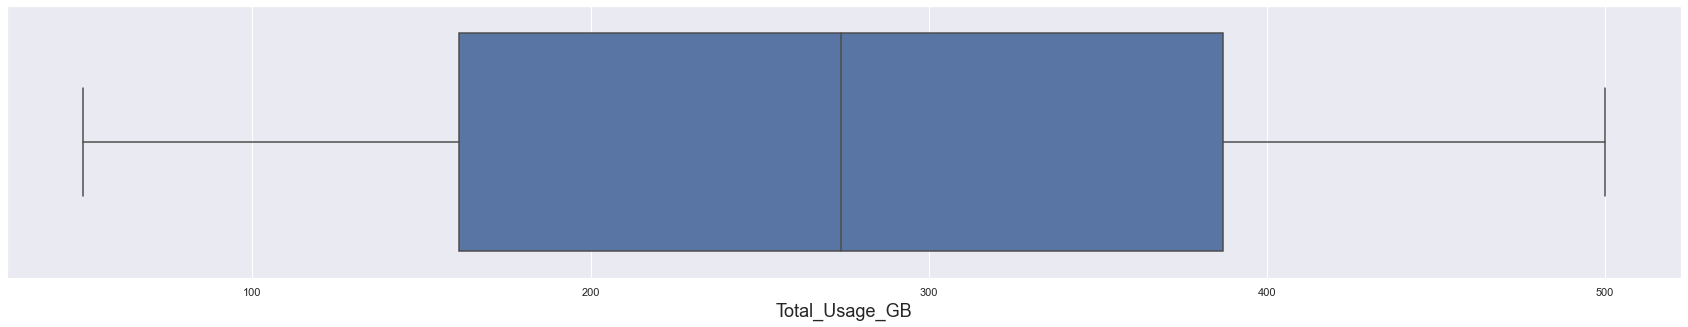

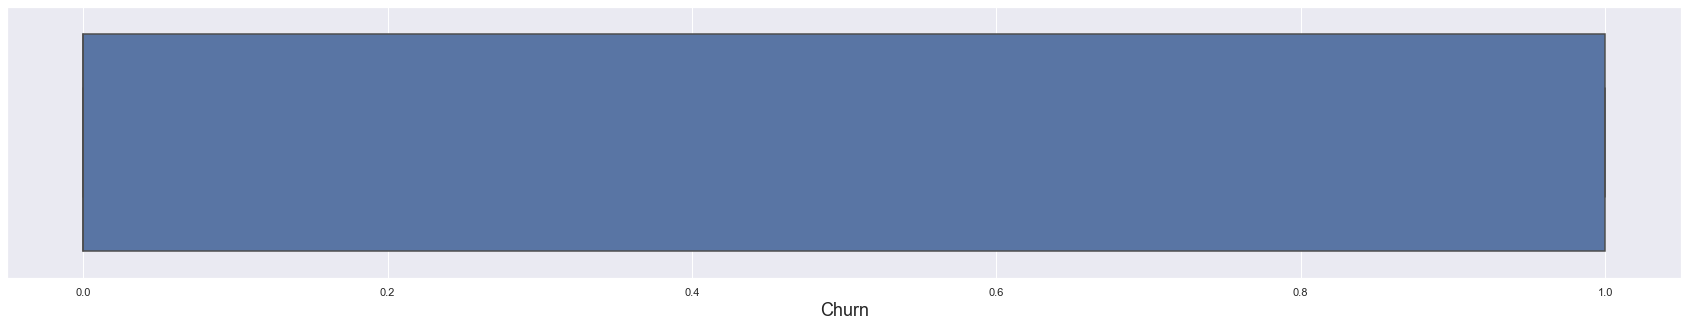

In [61]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

there are no outliers

In [62]:
# Encode Categorical Variables
# Let's use Label Encoding for simplicity (replace with one-hot encoding if needed)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Location']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [63]:
df.drop(['CustomerID','Name'], inplace=True, axis=1)

In [64]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,1,2,17.0,73.36,236.0,0.0
1,62.0,0,4,1.0,48.76,172.0,0.0
2,24.0,0,2,5.0,85.47,460.0,0.0
3,36.0,0,3,3.0,97.94,297.0,1.0
4,46.0,0,3,19.0,58.14,266.0,0.0


In [65]:
# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [66]:
df.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,1.995840,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,1.411638,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,0.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,4.000000,24.000000,100.000000,500.000000,1.000000


In [67]:
# Select the top k features based on mutual information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
num_features_to_select = 5  # Change this to the desired number of features
mi_selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)
X_new = mi_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = mi_selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB'],
      dtype='object')


all features other than customerid and name are important

In [68]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 6)
(20000, 6)
(80000,)
(20000,)


# FEATURE SCALING USING STANDARDIZATION¶

In [70]:
 #STANDARDIZATION
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Import necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
# Build Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

In [73]:
# Evaluate Logistic Regression model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Precision:", precision_score(y_test, logreg_predictions))
print("Recall:", recall_score(y_test, logreg_predictions))
print("F1-score:", f1_score(y_test, logreg_predictions))

Logistic Regression Performance:
Accuracy: 0.50225
Precision: 0.4977596204533474
Recall: 0.38070758996068943
F1-score: 0.4314352618653264


In [74]:
# Build Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [75]:
rf_predictions

array([1., 1., 0., ..., 0., 1., 1.])

In [76]:
# Evaluate Random Forest model
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1-score:", f1_score(y_test, rf_predictions))


Random Forest Performance:
Accuracy: 0.49735
Precision: 0.49308610936517916
Recall: 0.47444814030843663
F1-score: 0.483587609801202


In [77]:
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Perform k-fold cross-validation
num_folds = 5
scores = cross_val_score(logreg_model, X_train, y_train, cv=num_folds, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.5033125 0.496375  0.502875  0.5045625 0.506125 ]
Mean CV Accuracy: 0.50265
